In [1]:
from numpy import linalg as LA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def generate_test_image(m,n):
    X = np.zeros((m,n))
# generate a rectangle
    X[25:80,25:80] = 1
# generate a triangle
    for i in range(25, 80, 1):
        X[i+80:160, 100+i-1] = 2
# generate a circle
    for i in range(0,200,1):
        for j in range(0,200,1):
            if ((i - 135)*(i - 135) +(j - 53)*(j - 53) <= 900):
                X[i, j] = 3
    return X
X = generate_test_image(200,200)

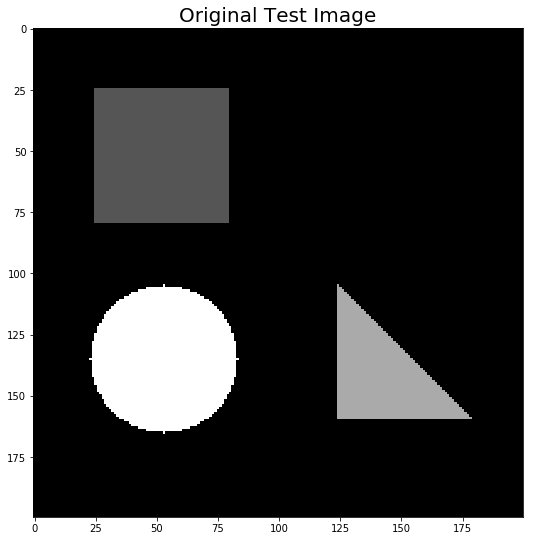

In [3]:
plt.figure(figsize = (9,9))
plt.imshow(X, cmap='gray')
plt.title('Original Test Image', fontsize = 20);
plt.show()

In [4]:
m = X.shape[0] # num of rows
n = X.shape[1] # num of columns

In [5]:
X = np.asarray(X, dtype=np.float64)
C = np.cov(X)

In [6]:
np.linalg.matrix_rank(C)

62

In [7]:
np.linalg.matrix_rank(X)

62

In [8]:
P, L = LA.eigh(C)

In [9]:
L.shape

(200, 200)

In [10]:
np.linalg.matrix_rank(L), np.linalg.matrix_rank(P) # P is an eigenvalues array! 

(200, 1)

In [11]:
P = P[::-1]
L = L[:,::-1]

In [12]:
np.allclose(L.dot(np.diag(P)).dot(L.T), C)

True

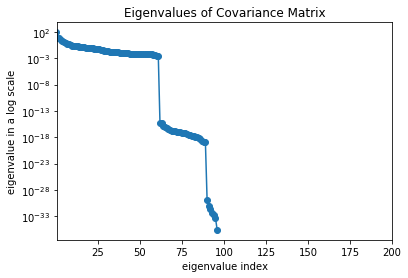

In [13]:
plt.semilogy(P, '-o')
plt.xlim([1, P.shape[0]])
plt.xlabel('eigenvalue index')
plt.ylabel('eigenvalue in a log scale')
plt.title('Eigenvalues of Covariance Matrix');
plt.show()

In [14]:
V = L.T.dot(X) # apply projection onto eigenbases, then get the coefficients

In [15]:
V.shape

(200, 200)

In [16]:
Re_X = L.dot(V) # Combining the eigenvectors with the coefficients

In [17]:
k = 63
X_tilda =  L[:,0:k-1].dot(L[:,0:k-1].T).dot(X)
np.allclose(X_tilda, X)

True

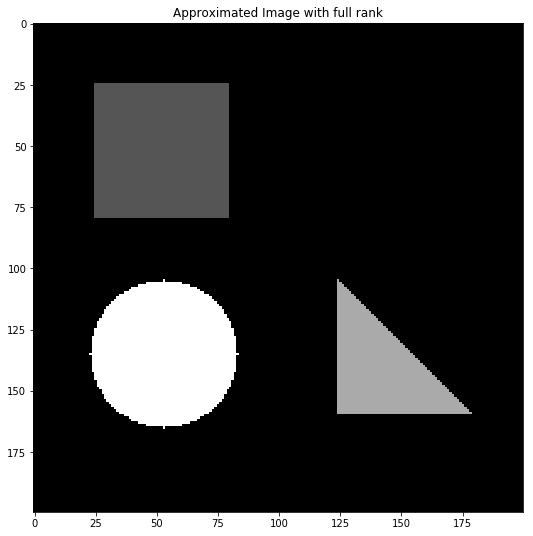

In [18]:
plt.figure(figsize = (9,9))
plt.imshow(X_tilda, cmap='gray')
plt.title('Approximated Image with full rank');
plt.show()

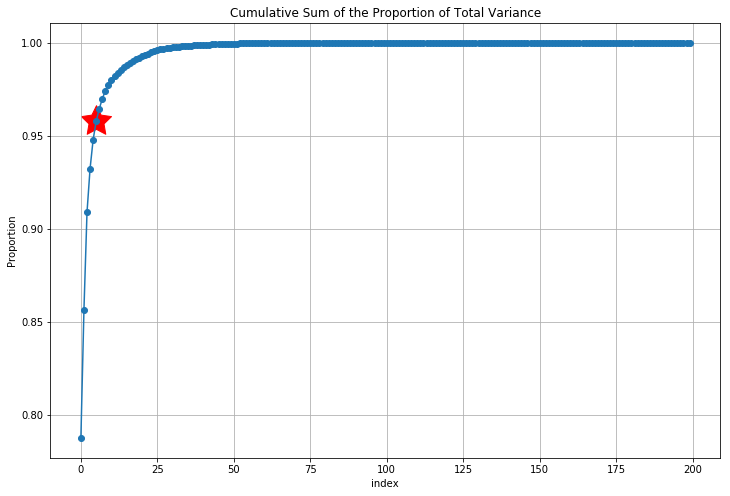

In [19]:
normed_cumsum = (P.cumsum()/P.sum())

plt.figure(figsize = (12,8))
plt.plot(normed_cumsum, '-o')
plt.scatter(len(np.where(normed_cumsum <= 0.95)[0]), normed_cumsum[len(np.where(normed_cumsum <= 0.95)[0])], marker=(5,1,0),color='r',s=1000)
plt.title('Cumulative Sum of the Proportion of Total Variance')
plt.xlabel('index')
plt.ylabel('Proportion');
plt.grid(True)
plt.show()

In [20]:
len(np.where(normed_cumsum <= 0.95)[0]), normed_cumsum[5]

(5, 0.9578068825616366)

In [21]:
normed_cumsum[normed_cumsum <= 0.95]

array([ 0.78760743,  0.85655507,  0.90888246,  0.93230163,  0.94785001])

In [22]:
len(P)

200

In [23]:
for k in range(len(P)):
    ratio = sum(P[0:k+1])/ sum(P)
    if  ratio >= 0.95:
        break
print("Pick the largest:", k+1)

Pick the largest: 6


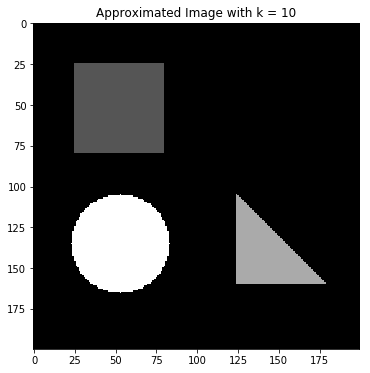

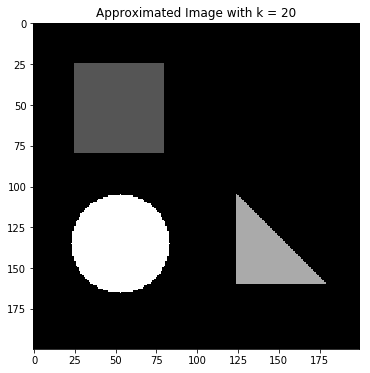

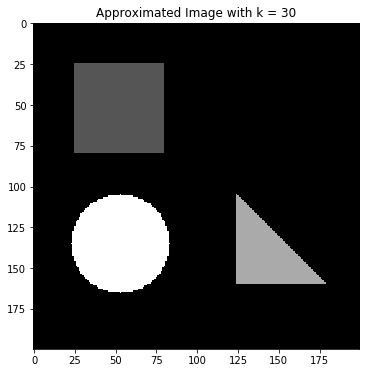

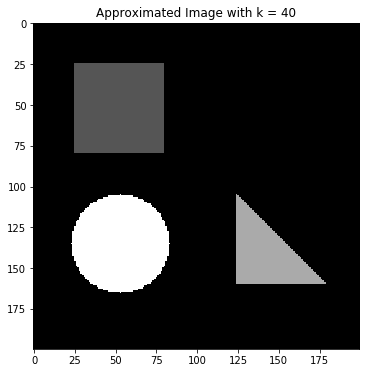

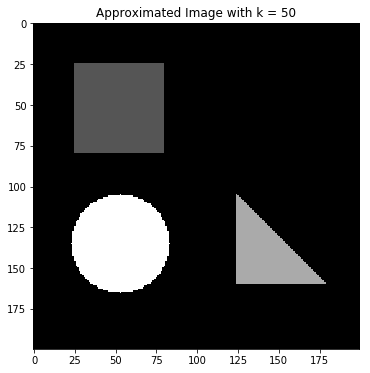

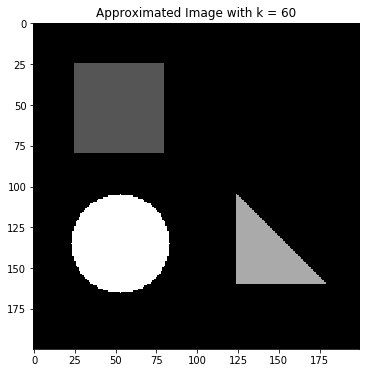

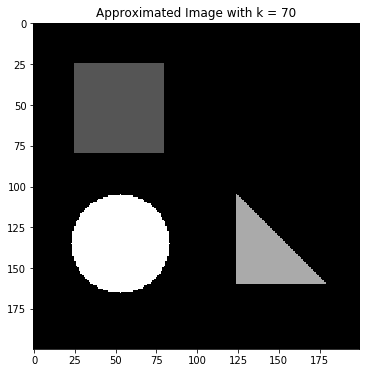

In [24]:
k_list = [10, 20, 30, 40, 50, 60, 70]
for i in range(len(k_list)):
    
    X_tilda_k = L[:,0:k_list[i]-1].dot(V[0:k_list[i]-1,:])
    plt.figure(figsize = (6,6))
    
    plt.imshow(X_tilda_k, cmap='gray')
    plt.title('Approximated Image with k ='+' '+str(k_list[i]));
    plt.show()

    
    

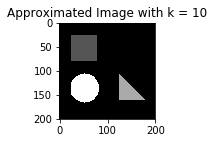

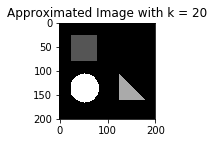

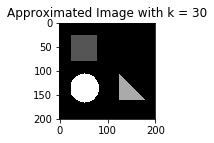

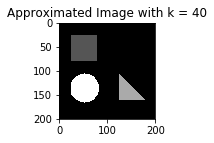

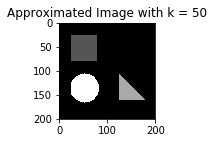

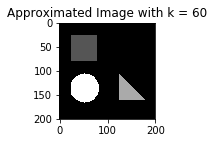

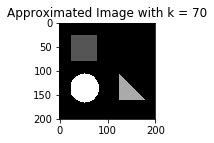

In [25]:
k_list = [10, 20, 30, 40, 50, 60, 70]
for i in range(len(k_list)):
    X_tilda_k = L[:,0:k_list[i]-1].dot(V[0:k_list[i]-1,:])
    plt.figure(figsize = (6,6))
    plt.subplot(3,3,i+1)
    plt.imshow(X_tilda_k, cmap='gray')
    plt.title('Approximated Image with k ='+' '+str(k_list[i]));
    plt.show()

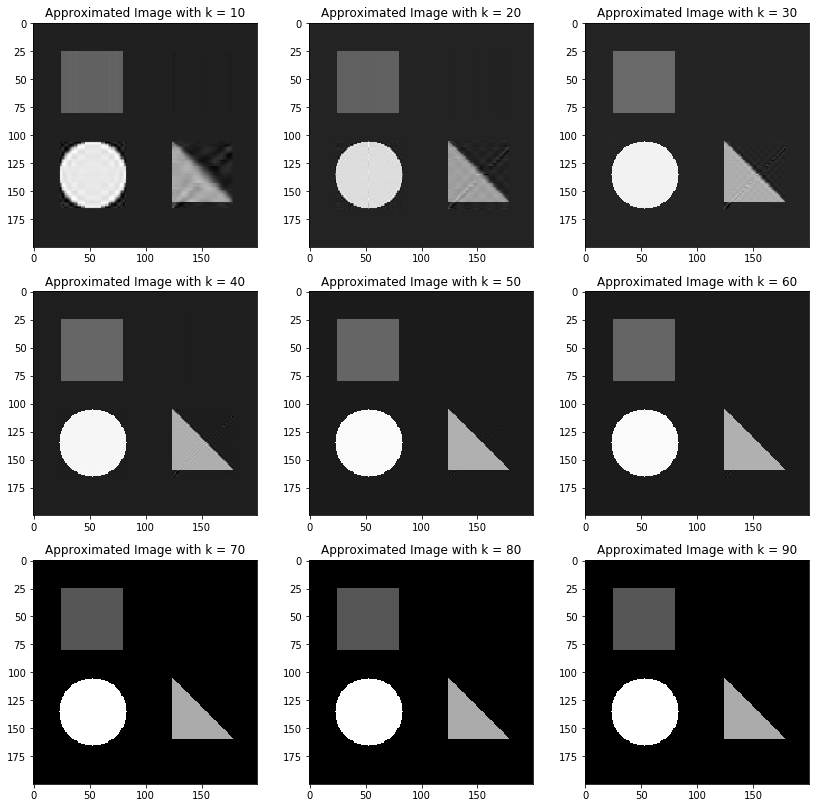

In [26]:
k_list = [10, 20, 30, 40, 50, 60, 70, 80, 90]

plt.figure(figsize = (14,14))

plt.subplot(3,3,1)
X_tilda_10 = L[:,0:k_list[0]-1].dot(V[0:k_list[0]-1,:])
plt.imshow(X_tilda_10, cmap='gray')
plt.title('Approximated Image with k ='+' '+str(k_list[0]));

plt.subplot(3,3,2)
X_tilda_10 = L[:,0:k_list[1]-1].dot(V[0:k_list[1]-1,:])
plt.imshow(X_tilda_10, cmap='gray')
plt.title('Approximated Image with k ='+' '+str(k_list[1]));

plt.subplot(3,3,3)
X_tilda_10 = L[:,0:k_list[2]-1].dot(V[0:k_list[2]-1,:])
plt.imshow(X_tilda_10, cmap='gray')
plt.title('Approximated Image with k ='+' '+str(k_list[2]));

plt.subplot(3,3,4)
X_tilda_10 = L[:,0:k_list[3]-1].dot(V[0:k_list[3]-1,:])
plt.imshow(X_tilda_10, cmap='gray')
plt.title('Approximated Image with k ='+' '+str(k_list[3]));

plt.subplot(3,3,5)
X_tilda_10 = L[:,0:k_list[4]-1].dot(V[0:k_list[4]-1,:])
plt.imshow(X_tilda_10, cmap='gray')
plt.title('Approximated Image with k ='+' '+str(k_list[4]));

plt.subplot(3,3,6)
X_tilda_10 = L[:,0:k_list[5]-1].dot(V[0:k_list[5]-1,:])
plt.imshow(X_tilda_10, cmap='gray')
plt.title('Approximated Image with k ='+' '+str(k_list[5]));

plt.subplot(3,3,7)
X_tilda_10 = L[:,0:k_list[6]-1].dot(V[0:k_list[6]-1,:])
plt.imshow(X_tilda_10, cmap='gray')
plt.title('Approximated Image with k ='+' '+str(k_list[6]));

plt.subplot(3,3,8)
X_tilda_10 = L[:,0:k_list[7]-1].dot(V[0:k_list[7]-1,:])
plt.imshow(X_tilda_10, cmap='gray')
plt.title('Approximated Image with k ='+' '+str(k_list[7]));

plt.subplot(3,3,9)
X_tilda_10 = L[:,0:k_list[8]-1].dot(V[0:k_list[8]-1,:])
plt.imshow(X_tilda_10, cmap='gray')
plt.title('Approximated Image with k ='+' '+str(k_list[8]));
    
    
plt.show()

In [27]:
(P/P.sum()).sum()

0.99999999999999989

In [28]:
P.cumsum()/P.sum()

array([ 0.78760743,  0.85655507,  0.90888246,  0.93230163,  0.94785001,
        0.95780688,  0.9644615 ,  0.96981289,  0.97424189,  0.97746822,
        0.97984551,  0.98188811,  0.98369447,  0.9854182 ,  0.98687373,
        0.98807119,  0.98924876,  0.9902997 ,  0.99118304,  0.99197675,
        0.9927469 ,  0.99344755,  0.99412674,  0.99473977,  0.99532252,
        0.99586723,  0.99636101,  0.99674506,  0.99702752,  0.99726041,
        0.99747792,  0.9976553 ,  0.99782974,  0.99799544,  0.99815058,
        0.9982927 ,  0.99841279,  0.99853017,  0.99863361,  0.99872493,
        0.99881564,  0.99889656,  0.99897514,  0.9990511 ,  0.99912401,
        0.99919108,  0.99925718,  0.99931929,  0.99938097,  0.99944233,
        0.99950004,  0.99955758,  0.99961213,  0.99966417,  0.99971428,
        0.99976357,  0.99981224,  0.9998599 ,  0.99990699,  0.99994703,
        0.99997584,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

In [29]:
(P/P.sum()).cumsum()

array([ 0.78760743,  0.85655507,  0.90888246,  0.93230163,  0.94785001,
        0.95780688,  0.9644615 ,  0.96981289,  0.97424189,  0.97746822,
        0.97984551,  0.98188811,  0.98369447,  0.9854182 ,  0.98687373,
        0.98807119,  0.98924876,  0.9902997 ,  0.99118304,  0.99197675,
        0.9927469 ,  0.99344755,  0.99412674,  0.99473977,  0.99532252,
        0.99586723,  0.99636101,  0.99674506,  0.99702752,  0.99726041,
        0.99747792,  0.9976553 ,  0.99782974,  0.99799544,  0.99815058,
        0.9982927 ,  0.99841279,  0.99853017,  0.99863361,  0.99872493,
        0.99881564,  0.99889656,  0.99897514,  0.9990511 ,  0.99912401,
        0.99919108,  0.99925718,  0.99931929,  0.99938097,  0.99944233,
        0.99950004,  0.99955758,  0.99961213,  0.99966417,  0.99971428,
        0.99976357,  0.99981224,  0.9998599 ,  0.99990699,  0.99994703,
        0.99997584,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

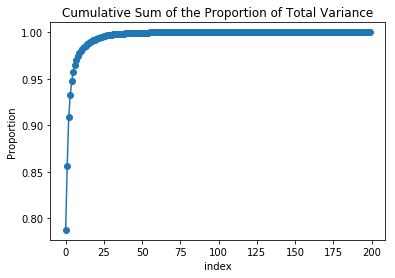

In [30]:
# Quant Visualization
plt.plot((P/P.sum()).cumsum(), '-o')
plt.title('Cumulative Sum of the Proportion of Total Variance')
plt.xlabel('index')
plt.ylabel('Proportion');
plt.show()

In [31]:
#V = L.T.dot(X) # apply projection onto eigenbases, then get the coefficients
X_tilde_10 = L[:,0:10-1].dot(V[0:10-1,:])
X_tilde_20 = L[:,0:20-1].dot(V[0:20-1,:])
X_tilde_30 = L[:,0:30-1].dot(V[0:30-1,:])
X_tilde_60 = L[:,0:60-1].dot(V[0:60-1,:])

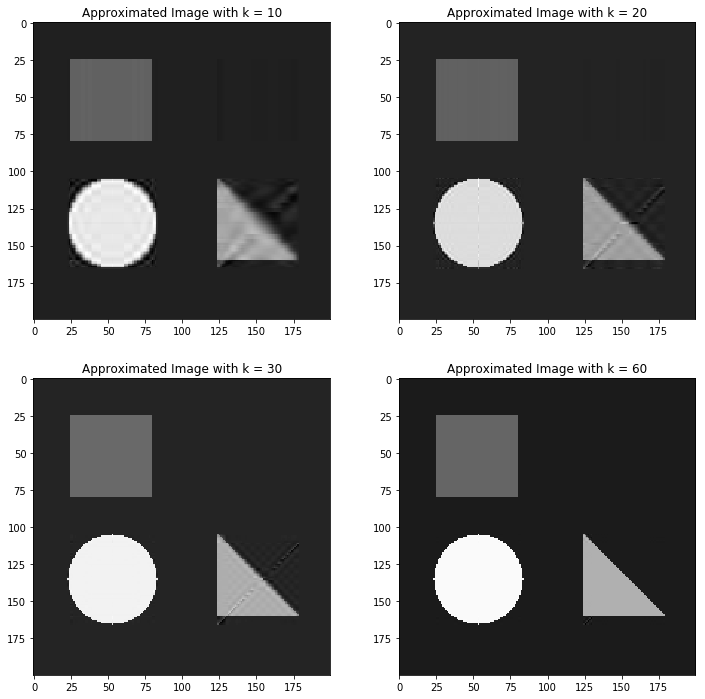

In [32]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
ax1.imshow(X_tilde_10, cmap='gray')
ax1.set(title='Approximated Image with k = 10')
ax2.imshow(X_tilde_20, cmap='gray')
ax2.set(title='Approximated Image with k = 20')
ax3.imshow(X_tilde_30, cmap='gray')
ax3.set(title='Approximated Image with k = 30')
ax4.imshow(X_tilde_60, cmap='gray')
ax4.set(title='Approximated Image with k = 60');
plt.show()

## PCA in Finance

In [33]:
df_sp500 = pd.read_csv('S&P500_Price.csv')
df_sp500

,Date,MMM,ABT,ACN,AAP,AES,AMG,APD,ARE,MO,...,ULTA,UAA,UA,VFC,VIAB,DIS,WHR,WYN,WYNN,YUM
0,2011-01-03,73.285281,19.266975,41.751978,64.448115,10.839035,100.438777,75.400295,59.827065,17.907454,...,33.936879,6.94625,NaN,18.647948,34.196631,34.524996,77.555565,26.516894,82.702155,30.563895
1,2011-01-04,73.183953,19.448283,41.477011,61.240468,10.890896,98.782754,74.284240,58.879596,17.827053,...,33.897325,6.83125,NaN,18.367236,34.256775,35.593061,76.441138,26.352622,85.282091,30.096938
2,2011-01-05,73.183953,19.448283,41.485604,61.319183,11.037837,99.012203,73.959419,59.329242,17.892836,...,34.134646,6.94250,NaN,18.384510,34.884000,36.478552,76.955489,26.266163,86.382359,30.240138
3,2011-01-06,72.736423,19.407993,41.640272,59.302105,11.227995,99.760406,73.576296,58.670831,17.965927,...,36.764952,6.83000,NaN,18.051974,34.729342,36.195560,75.318138,25.885745,87.012167,30.451825
4,2011-01-07,72.812418,19.488574,41.709014,60.886249,11.227995,99.351388,73.709556,60.630005,17.827053,...,37.130822,6.69375,NaN,17.730234,34.815263,36.012984,75.000955,25.790640,90.092915,30.831617
5,2011-01-10,73.589264,19.315324,41.339527,61.338862,11.210708,103.002619,73.717885,60.469417,17.717416,...,37.427473,6.90250,NaN,17.857634,34.909776,36.058628,75.352428,25.565848,90.070151,30.875200
6,2011-01-11,74.087459,19.275034,41.906646,60.974804,11.357649,102.543721,73.559638,60.075976,17.593160,...,36.755064,6.79875,NaN,17.870590,35.219093,35.967341,75.258130,25.643661,88.848475,30.675964
7,2011-01-12,74.864305,19.347557,42.869030,61.791475,11.184778,104.269576,73.834487,60.710299,17.585851,...,36.675957,6.87750,NaN,17.928892,35.416711,35.757379,76.886909,25.470743,88.613245,30.756904
8,2011-01-13,74.340778,19.262164,42.851844,61.978424,11.176134,105.616342,74.009391,60.116123,17.629706,...,36.705622,6.93375,NaN,17.782058,35.459672,35.839538,74.983810,25.505327,88.567717,30.600460
9,2011-01-14,74.391442,19.066980,42.963550,62.165372,11.227995,104.518977,73.901117,60.397153,17.658942,...,36.646292,7.03750,NaN,18.127550,35.906462,35.866924,75.643894,26.231580,90.161208,29.937137


In [34]:
df_sp500.set_index('Date', inplace = True)

In [35]:
start_date = '2013-01-01'
end_date = '2015-01-01'
df2 = df_sp500.loc[start_date:end_date]
df2

,MMM,ABT,ACN,AAP,AES,AMG,APD,ARE,MO,APC,...,ULTA,UAA,UA,VFC,VIAB,DIS,WHR,WYN,WYNN,YUM
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,84.319835,28.796655,61.870948,71.832049,9.544319,134.526907,75.718289,59.980240,26.573144,73.146992,...,101.530,12.0825,NaN,33.940313,50.171644,48.169335,97.159623,49.502991,102.828047,43.440158
2013-01-03,84.221975,29.892814,61.646973,71.832049,9.492259,133.589159,75.453724,60.277466,26.589476,73.406651,...,101.990,12.4150,NaN,34.263103,50.565779,48.273026,96.914843,49.745389,103.934100,43.711821
2013-01-04,84.844721,29.713116,61.987415,72.951792,9.717852,136.771516,76.467887,60.837949,26.573144,75.272352,...,97.850,12.3375,NaN,34.719072,51.515287,49.196821,96.089843,50.400761,105.188206,44.190464
2013-01-07,84.951478,29.955709,61.718645,72.704061,9.414169,136.971037,76.397337,61.109699,26.507813,75.253118,...,96.320,12.1075,NaN,33.719101,50.422457,48.046790,94.621161,50.275073,105.545279,43.912334
2013-01-08,84.960374,29.964694,62.077006,71.514953,9.414169,136.821397,76.538438,60.888902,26.246492,75.349288,...,95.090,12.1600,NaN,33.698786,51.094279,47.848834,95.201381,50.310984,105.454095,42.068908
2013-01-09,85.769944,30.162362,62.515997,71.732956,9.457553,137.819001,77.570238,61.220097,26.050501,75.012692,...,94.220,11.6625,NaN,33.339880,51.775058,47.867687,95.926656,50.643158,105.832678,42.143292
2013-01-10,86.196970,30.413940,61.969497,71.108674,9.622409,138.417563,77.499688,61.075730,26.703805,74.685714,...,94.320,11.9200,NaN,34.066721,52.402092,47.877114,95.899458,50.436671,107.034530,43.073019
2013-01-11,85.654291,30.108452,62.605587,71.633864,9.639762,139.315407,77.931809,61.381449,26.891630,74.858820,...,93.390,12.0225,NaN,33.633325,51.757143,47.679158,95.237645,50.293028,107.112912,43.476118
2013-01-14,86.366001,30.099430,62.587669,71.921232,9.570349,139.475023,77.596695,61.474863,26.940627,74.887671,...,94.990,12.0850,NaN,34.734873,51.739228,47.688584,95.582150,50.275073,106.947440,43.008003


In [36]:
(df2[df2.columns[0:13]].isnull()).any()

MMM     False
ABT     False
ACN     False
AAP     False
AES     False
AMG     False
APD     False
ARE     False
MO      False
APC     False
T       False
AYI     False
ABBV    False
dtype: bool

In [37]:
(df2[df2.columns[0:11]].isnull()).sum()

MMM    0
ABT    0
ACN    0
AAP    0
AES    0
AMG    0
APD    0
ARE    0
MO     0
APC    0
T      0
dtype: int64

In [38]:
(df2[df2.columns[0:11]]).count(),  len(df2)

(MMM    504
 ABT    504
 ACN    504
 AAP    504
 AES    504
 AMG    504
 APD    504
 ARE    504
 MO     504
 APC    504
 T      504
 dtype: int64, 504)

In [39]:
df_pca = df2[df2.columns[0:11]]
df_pca

,MMM,ABT,ACN,AAP,AES,AMG,APD,ARE,MO,APC,T
Date,,,,,,,,,,,
2013-01-02,84.319835,28.796655,61.870948,71.832049,9.544319,134.526907,75.718289,59.980240,26.573144,73.146992,27.038150
2013-01-03,84.221975,29.892814,61.646973,71.832049,9.492259,133.589159,75.453724,60.277466,26.589476,73.406651,27.053600
2013-01-04,84.844721,29.713116,61.987415,72.951792,9.717852,136.771516,76.467887,60.837949,26.573144,75.272352,27.215829
2013-01-07,84.951478,29.955709,61.718645,72.704061,9.414169,136.971037,76.397337,61.109699,26.507813,75.253118,27.339432
2013-01-08,84.960374,29.964694,62.077006,71.514953,9.414169,136.821397,76.538438,60.888902,26.246492,75.349288,26.883646
2013-01-09,85.769944,30.162362,62.515997,71.732956,9.457553,137.819001,77.570238,61.220097,26.050501,75.012692,26.797556
2013-01-10,86.196970,30.413940,61.969497,71.108674,9.622409,138.417563,77.499688,61.075730,26.703805,74.685714,26.899299
2013-01-11,85.654291,30.108452,62.605587,71.633864,9.639762,139.315407,77.931809,61.381449,26.891630,74.858820,26.821035
2013-01-14,86.366001,30.099430,62.587669,71.921232,9.570349,139.475023,77.596695,61.474863,26.940627,74.887671,26.625375


In [40]:
df_pca.cov()

,MMM,ABT,ACN,AAP,AES,AMG,APD,ARE,MO,APC,T
MMM,305.545164,55.968653,67.036168,424.275204,14.276269,321.765571,291.031426,88.961469,80.288624,75.589647,8.953110
ABT,55.968653,11.906654,13.680326,81.860800,2.502149,53.126935,54.628177,20.107462,16.397522,14.493609,2.228053
ACN,67.036168,13.680326,21.880221,98.921616,3.063630,64.382096,60.683134,22.768016,17.982745,10.194247,2.170175
AAP,424.275204,81.860800,98.921616,640.324248,19.359921,416.426801,408.547211,141.456852,115.042956,91.168788,11.910965
AES,14.276269,2.502149,3.063630,19.359921,1.117161,19.616339,13.557376,2.707973,3.018953,6.235367,0.554510
AMG,321.765571,53.126935,64.382096,416.426801,19.616339,454.634747,304.240061,53.247988,70.411229,94.527542,6.726422
APD,291.031426,54.628177,60.683134,408.547211,13.557376,304.240061,294.456211,89.666614,78.271740,85.067673,8.033176
ARE,88.961469,20.107462,22.768016,141.456852,2.707973,53.247988,89.666614,47.355381,30.103132,21.234342,4.051665
MO,80.288624,16.397522,17.982745,115.042956,3.018953,70.411229,78.271740,30.103132,25.593994,19.234411,3.216810
APC,75.589647,14.493609,10.194247,91.168788,6.235367,94.527542,85.067673,21.234342,19.234411,91.889168,6.127135


In [41]:
df_pca.corr()

,MMM,ABT,ACN,AAP,AES,AMG,APD,ARE,MO,APC,T
MMM,1.000000,0.927924,0.819871,0.959202,0.772714,0.863318,0.970268,0.739570,0.907919,0.451120,0.457194
ABT,0.927924,1.000000,0.847570,0.937521,0.686057,0.722085,0.922596,0.846794,0.939322,0.438177,0.576361
ACN,0.819871,0.847570,1.000000,0.835729,0.619659,0.645517,0.756017,0.707318,0.759908,0.227351,0.414126
AAP,0.959202,0.937521,0.835729,1.000000,0.723845,0.771805,0.940875,0.812343,0.898651,0.375850,0.420156
AES,0.772714,0.686057,0.619659,0.723845,1.000000,0.870420,0.747493,0.372307,0.564585,0.615420,0.468291
AMG,0.863318,0.722085,0.645517,0.771805,0.870420,1.000000,0.831524,0.362900,0.652742,0.462482,0.281590
APD,0.970268,0.922596,0.756017,0.940875,0.747493,0.831524,1.000000,0.759339,0.901624,0.517157,0.417870
ARE,0.739570,0.846794,0.707318,0.812343,0.372307,0.362900,0.759339,1.000000,0.864685,0.321901,0.525549
MO,0.907919,0.939322,0.759908,0.898651,0.564585,0.652742,0.901624,0.864685,1.000000,0.396623,0.567571
APC,0.451120,0.438177,0.227351,0.375850,0.615420,0.462482,0.517157,0.321901,0.396623,1.000000,0.570544


In [42]:
(df_pca.corr()[df_pca.corr()< 0.3])

,MMM,ABT,ACN,AAP,AES,AMG,APD,ARE,MO,APC,T
MMM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.227351,NaN
AAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28159
APD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APC,NaN,NaN,0.227351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
(df_pca.corr()[df_pca.corr()< 0.3]).count()

MMM    0
ABT    0
ACN    1
AAP    0
AES    0
AMG    1
APD    0
ARE    0
MO     0
APC    1
T      1
dtype: int64

In [44]:
(df_pca.corr()[df_pca.corr()< 0.3]).count().sum()

4

In [45]:
(df_pca.corr()< 0.2).any()

MMM    False
ABT    False
ACN    False
AAP    False
AES    False
AMG    False
APD    False
ARE    False
MO     False
APC    False
T      False
dtype: bool

In [46]:
X_pca = np.asarray(df_pca) # Data matrix: columns are prices
X_pca[:,0]

array([  84.31983496,   84.22197484,   84.84472104,   84.95147753,
         84.9603739 ,   85.76994396,   86.19696992,   85.65429109,
         86.36600103,   86.55282489,   86.82861249,   87.25563845,
         87.84279915,   88.36768523,   88.51002722,   88.67016196,
         89.48862839,   89.54200663,   90.57398604,   89.67545224,
         89.45304289,   90.35157669,   89.64876312,   90.28930207,
         91.35686697,   90.93873739,   91.33017785,   91.29459235,
         92.04188779,   92.0730251 ,   92.00141474,   92.40422303,
         93.2545961 ,   92.33261267,   91.94770696,   92.68171319,
         91.0794313 ,   91.58070385,   92.70856708,   93.09347278,
         92.88759299,   92.44897951,   93.49628108,   93.68425828,
         93.57684274,   94.62414431,   94.71365726,   94.10496917,
         94.06916399,   94.90163446,   95.24178369,   94.35560544,
         94.14972565,   94.57938783,   93.93489456,   95.25968628,
         94.14077435,   94.94639094,   94.2481899 ,   95.16122

In [47]:
df_pca[df_pca.columns[0]]

Date
2013-01-02     84.319835
2013-01-03     84.221975
2013-01-04     84.844721
2013-01-07     84.951478
2013-01-08     84.960374
2013-01-09     85.769944
2013-01-10     86.196970
2013-01-11     85.654291
2013-01-14     86.366001
2013-01-15     86.552825
2013-01-16     86.828612
2013-01-17     87.255638
2013-01-18     87.842799
2013-01-22     88.367685
2013-01-23     88.510027
2013-01-24     88.670162
2013-01-25     89.488628
2013-01-28     89.542007
2013-01-29     90.573986
2013-01-30     89.675452
2013-01-31     89.453043
2013-02-01     90.351577
2013-02-04     89.648763
2013-02-05     90.289302
2013-02-06     91.356867
2013-02-07     90.938737
2013-02-08     91.330178
2013-02-11     91.294592
2013-02-12     92.041888
2013-02-13     92.073025
                 ...    
2014-11-18    148.415350
2014-11-19    147.984422
2014-11-20    148.478231
2014-11-21    149.223604
2014-11-24    148.962724
2014-11-25    147.267001
2014-11-26    147.499930
2014-11-28    149.158384
2014-12-01    147.36

In [48]:
m = X_pca.shape[0] # num of rows
n = X_pca.shape[1] # num of columns
m,n

(504, 11)

In [49]:
C_pca = np.cov(X_pca.T)
C_pca.shape

(11, 11)

In [50]:
np.linalg.matrix_rank(C_pca)

11

In [51]:
W, D = LA.eigh(C_pca)

In [52]:
W = W[::-1]
D = D[:,::-1]
W

array([  1.63354801e+03,   1.49143043e+02,   7.47239759e+01,
         1.74255681e+01,   9.34868982e+00,   4.67607295e+00,
         4.17099642e+00,   1.92995518e+00,   6.09297242e-01,
         2.84639000e-01,   9.77821232e-02])

In [53]:
X_reduced = (X_pca.dot(D[:,0:3]))
X_reduced

array([[ 201.4424494 ,  -48.25353249,  -45.58633178],
       [ 200.98404095,  -47.44560086,  -46.09548712],
       [ 204.14601388,  -49.51351756,  -47.12188267],
       ..., 
       [ 357.45793187,  -51.85856283,  -36.02124   ],
       [ 355.44665965,  -51.84877464,  -35.93131574],
       [ 352.60767171,  -51.80155474,  -34.83579337]])

In [54]:
np.cov(X_reduced.T)

array([[  1.63354801e+03,  -2.45907116e-13,   5.78604979e-14],
       [ -2.45907116e-13,   1.49143043e+02,   2.16976867e-14],
       [  5.78604979e-14,   2.16976867e-14,   7.47239759e+01]])

In [55]:
for z in range(len(W)):
    ratio = sum(W[0:z+1])/ sum(W)
    if  ratio >= 0.95:
        break
print("Pick the first %d largest!"  % (z+1))
print("Pick the first k-largest:",(z+1))

Pick the first 3 largest!
Pick the first k-largest: 3


In [93]:
N = range(1,12)
for i in range(len(W)):
    ratio = sum(W[0:i+1])/ sum(W)
    if  ratio >= 0.95:
        break
print("Pick the first %d largest!"  % (i+1))
print("Pick the first k-largest:",(i+1))


Pick the first 3 largest!
Pick the first k-largest: 3


In [94]:
N = range(1,12)
for item in N:
    ratio = sum(W[0:item])/ sum(W)
    if  ratio >= 0.95:
        break
print("Pick the first %d largest!"  % (item))
print("Pick the first k-largest:",(item))
    

Pick the first 3 largest!
Pick the first k-largest: 3


In [57]:
sum(W[0:2])/ sum(W)

0.94025871102816838

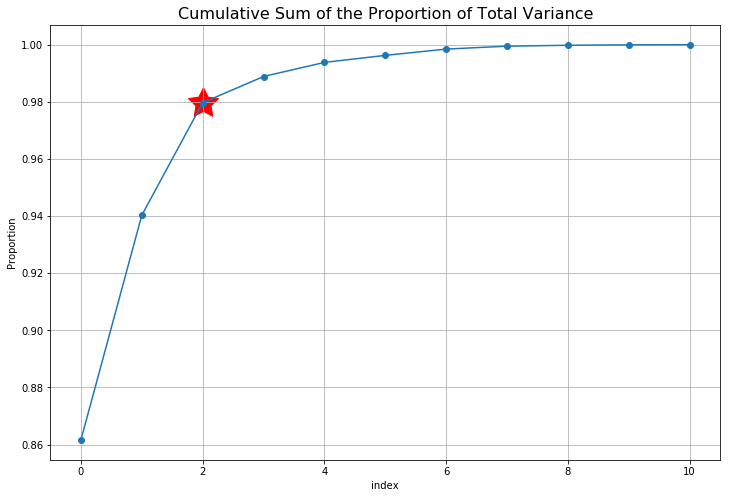

In [58]:
normed_cumsum_assets = (W.cumsum()/W.sum())

plt.figure(figsize = (12,8))
plt.plot(normed_cumsum_assets, '-o')
plt.scatter(len(np.where(normed_cumsum_assets <= 0.95)[0]), normed_cumsum_assets[len(np.where(normed_cumsum_assets <= 0.95)[0])], marker=(5,1,0),color='r',s=1000)
plt.title('Proportion of k-Cumulative Sum Variance and Total Variance',  fontsize = 16)
plt.xlabel('index')
plt.ylabel('Proportion');
plt.grid(True)
plt.show()

In [59]:
len(normed_cumsum_assets)

11

In [60]:
df_pca.var()

MMM    305.545164
ABT     11.906654
ACN     21.880221
AAP    640.324248
AES      1.117161
AMG    454.634747
APD    294.456211
ARE     47.355381
MO      25.593994
APC     91.889168
T        1.255082
dtype: float64

In [61]:
df_pca.var().sum()

1895.9580320053255

In [62]:
df_pca.var().nlargest(3)

AAP    640.324248
AMG    454.634747
MMM    305.545164
dtype: float64

In [63]:
df_pca.var().nlargest(3).sum()/df_pca.var().sum()

0.7386788823698389

In [64]:
df_pca.var().sort_values(ascending = False)[:3]

AAP    640.324248
AMG    454.634747
MMM    305.545164
dtype: float64

In [65]:
(df_pca.var().sort_values(ascending = False)[:3]).sum()

1400.504160101813

In [66]:
(df_pca.var().sort_values(ascending = False)[:3]).sum()/ df_pca.var().sum()

0.7386788823698389

In [67]:
df_pca.cov()

,MMM,ABT,ACN,AAP,AES,AMG,APD,ARE,MO,APC,T
MMM,305.545164,55.968653,67.036168,424.275204,14.276269,321.765571,291.031426,88.961469,80.288624,75.589647,8.953110
ABT,55.968653,11.906654,13.680326,81.860800,2.502149,53.126935,54.628177,20.107462,16.397522,14.493609,2.228053
ACN,67.036168,13.680326,21.880221,98.921616,3.063630,64.382096,60.683134,22.768016,17.982745,10.194247,2.170175
AAP,424.275204,81.860800,98.921616,640.324248,19.359921,416.426801,408.547211,141.456852,115.042956,91.168788,11.910965
AES,14.276269,2.502149,3.063630,19.359921,1.117161,19.616339,13.557376,2.707973,3.018953,6.235367,0.554510
AMG,321.765571,53.126935,64.382096,416.426801,19.616339,454.634747,304.240061,53.247988,70.411229,94.527542,6.726422
APD,291.031426,54.628177,60.683134,408.547211,13.557376,304.240061,294.456211,89.666614,78.271740,85.067673,8.033176
ARE,88.961469,20.107462,22.768016,141.456852,2.707973,53.247988,89.666614,47.355381,30.103132,21.234342,4.051665
MO,80.288624,16.397522,17.982745,115.042956,3.018953,70.411229,78.271740,30.103132,25.593994,19.234411,3.216810
APC,75.589647,14.493609,10.194247,91.168788,6.235367,94.527542,85.067673,21.234342,19.234411,91.889168,6.127135


In [68]:
df_pca.corr()

,MMM,ABT,ACN,AAP,AES,AMG,APD,ARE,MO,APC,T
MMM,1.000000,0.927924,0.819871,0.959202,0.772714,0.863318,0.970268,0.739570,0.907919,0.451120,0.457194
ABT,0.927924,1.000000,0.847570,0.937521,0.686057,0.722085,0.922596,0.846794,0.939322,0.438177,0.576361
ACN,0.819871,0.847570,1.000000,0.835729,0.619659,0.645517,0.756017,0.707318,0.759908,0.227351,0.414126
AAP,0.959202,0.937521,0.835729,1.000000,0.723845,0.771805,0.940875,0.812343,0.898651,0.375850,0.420156
AES,0.772714,0.686057,0.619659,0.723845,1.000000,0.870420,0.747493,0.372307,0.564585,0.615420,0.468291
AMG,0.863318,0.722085,0.645517,0.771805,0.870420,1.000000,0.831524,0.362900,0.652742,0.462482,0.281590
APD,0.970268,0.922596,0.756017,0.940875,0.747493,0.831524,1.000000,0.759339,0.901624,0.517157,0.417870
ARE,0.739570,0.846794,0.707318,0.812343,0.372307,0.362900,0.759339,1.000000,0.864685,0.321901,0.525549
MO,0.907919,0.939322,0.759908,0.898651,0.564585,0.652742,0.901624,0.864685,1.000000,0.396623,0.567571
APC,0.451120,0.438177,0.227351,0.375850,0.615420,0.462482,0.517157,0.321901,0.396623,1.000000,0.570544


In [69]:
df_pca.mean().nlargest(5)

AMG    183.964522
MMM    116.979005
AAP    107.387610
APD    101.489909
APC     88.070700
dtype: float64

In [70]:
df_pca.mean().nlargest(5).index

Index(['AMG', 'MMM', 'AAP', 'APD', 'APC'], dtype='object')

In [71]:
(df_pca[df_pca.mean().nlargest(5).index].corr() < 0.4)

,AMG,MMM,AAP,APD,APC
AMG,False,False,False,False,False
MMM,False,False,False,False,False
AAP,False,False,False,False,True
APD,False,False,False,False,False
APC,False,False,True,False,False


In [72]:
df_pca[df_pca.mean().nlargest(5).index].corr()[df_pca[df_pca.mean().nlargest(5).index].corr() < 0.4]

,AMG,MMM,AAP,APD,APC
AMG,NaN,NaN,NaN,NaN,NaN
MMM,NaN,NaN,NaN,NaN,NaN
AAP,NaN,NaN,NaN,NaN,0.37585
APD,NaN,NaN,NaN,NaN,NaN
APC,NaN,NaN,0.37585,NaN,NaN


In [73]:
df_pca.var()[['APC', 'AAP']]

APC     91.889168
AAP    640.324248
dtype: float64

In [74]:
df_pca.var().nlargest(3)

AAP    640.324248
AMG    454.634747
MMM    305.545164
dtype: float64

In [75]:
df_pca.mean().nlargest(3)

AMG    183.964522
MMM    116.979005
AAP    107.387610
dtype: float64

In [76]:
df_pca.var().argmax()

'AAP'

In [77]:
df_pca.var().argmin()

'AES'

In [78]:
df_pca[[df_pca.var().argmax(), df_pca.var().argmin()]].corr()

,AAP,AES
AAP,1.000000,0.723845
AES,0.723845,1.000000


In [79]:
df_pca.corr()

,MMM,ABT,ACN,AAP,AES,AMG,APD,ARE,MO,APC,T
MMM,1.000000,0.927924,0.819871,0.959202,0.772714,0.863318,0.970268,0.739570,0.907919,0.451120,0.457194
ABT,0.927924,1.000000,0.847570,0.937521,0.686057,0.722085,0.922596,0.846794,0.939322,0.438177,0.576361
ACN,0.819871,0.847570,1.000000,0.835729,0.619659,0.645517,0.756017,0.707318,0.759908,0.227351,0.414126
AAP,0.959202,0.937521,0.835729,1.000000,0.723845,0.771805,0.940875,0.812343,0.898651,0.375850,0.420156
AES,0.772714,0.686057,0.619659,0.723845,1.000000,0.870420,0.747493,0.372307,0.564585,0.615420,0.468291
AMG,0.863318,0.722085,0.645517,0.771805,0.870420,1.000000,0.831524,0.362900,0.652742,0.462482,0.281590
APD,0.970268,0.922596,0.756017,0.940875,0.747493,0.831524,1.000000,0.759339,0.901624,0.517157,0.417870
ARE,0.739570,0.846794,0.707318,0.812343,0.372307,0.362900,0.759339,1.000000,0.864685,0.321901,0.525549
MO,0.907919,0.939322,0.759908,0.898651,0.564585,0.652742,0.901624,0.864685,1.000000,0.396623,0.567571
APC,0.451120,0.438177,0.227351,0.375850,0.615420,0.462482,0.517157,0.321901,0.396623,1.000000,0.570544


In [80]:
df_pca['APC'].var()

91.88916822054878

In [81]:
df_pca.var().sort_values()

AES      1.117161
T        1.255082
ABT     11.906654
ACN     21.880221
MO      25.593994
ARE     47.355381
APC     91.889168
APD    294.456211
MMM    305.545164
AMG    454.634747
AAP    640.324248
dtype: float64